In [18]:
import tensorflow as tf
import matplotlib.pyplot as pl
import numpy as np
from scipy import signal
import itertools

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


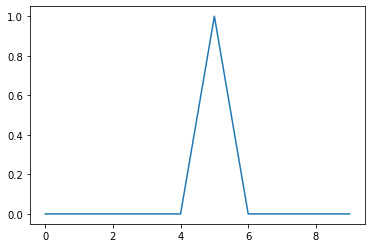

In [41]:
# 1D impulse
impulse = signal.unit_impulse(10, 'mid')
pl.plot(impulse)
print(impulse)

In [43]:
# 2D impulse
impulse = signal.unit_impulse((5,5), 'mid')
print(impulse)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [135]:
# shape should be [samples, time steps, features]
samps = 100
impulse = signal.unit_impulse(samps, 3)
impulse = impulse.reshape((1,samps,1))

In [138]:
def lstm_model(
        input_shape,
        architecture=[1,1], 
        rec_init='orthogonal',
        bias_init='zeros'):
    assert len(architecture) > 1, "The architecture should include at least input and output"
    model = tf.keras.models.Sequential()
    for i in range(len(architecture) - 1):
        model.add(tf.keras.layers.LSTM(
            units=architecture[i], 
            activation='tanh', 
            recurrent_activation='sigmoid', 
            return_sequences=True,
            recurrent_initializer=rec_init,
            bias_initializer=bias_init,
            input_shape=input_shape,
        ))
    model.add(tf.keras.layers.Dense(units=architecture[-1], activation='sigmoid'))
    # model.compile(loss='mean_squared_error', optimizer='adam')
    model.build()
    return model

In [139]:
model = lstm_model(
    input_shape=(impulse.shape[1], impulse.shape[2]), 
    architecture=[3,3,1])
model.summary()
model.predict(impulse)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 100, 3)            60        
_________________________________________________________________
lstm_34 (LSTM)               (None, 100, 3)            84        
_________________________________________________________________
dense_27 (Dense)             (None, 100, 1)            4         
Total params: 148
Trainable params: 148
Non-trainable params: 0
_________________________________________________________________


array([[[0.5       ],
        [0.5       ],
        [0.5       ],
        [0.50293726],
        [0.50521576],
        [0.5061813 ],
        [0.5063702 ],
        [0.5061213 ],
        [0.5056445 ],
        [0.50506765],
        [0.5044666 ],
        [0.5038846 ],
        [0.50334466],
        [0.5028572 ],
        [0.50242543],
        [0.5020482 ],
        [0.5017219 ],
        [0.50144196],
        [0.5012033 ],
        [0.50100094],
        [0.5008301 ],
        [0.5006866 ],
        [0.5005663 ],
        [0.5004659 ],
        [0.5003824 ],
        [0.5003131 ],
        [0.50025576],
        [0.50020844],
        [0.50016946],
        [0.5001375 ],
        [0.5001113 ],
        [0.5000899 ],
        [0.5000725 ],
        [0.50005823],
        [0.50004673],
        [0.50003743],
        [0.5000299 ],
        [0.50002384],
        [0.50001895],
        [0.500015  ],
        [0.5000119 ],
        [0.5000094 ],
        [0.5000074 ],
        [0.50000584],
        [0.50000453],
        [0

In [172]:
init_set = itertools.product([0,1,2], repeat=3)
architectures = list()
for comb in list(init_set):
    candidate = [i for i in comb if i != 0]
    if len(candidate) > 1:
        architectures.append(candidate)

In [173]:
architectures


[[1, 1],
 [1, 2],
 [2, 1],
 [2, 2],
 [1, 1],
 [1, 2],
 [1, 1],
 [1, 1, 1],
 [1, 1, 2],
 [1, 2],
 [1, 2, 1],
 [1, 2, 2],
 [2, 1],
 [2, 2],
 [2, 1],
 [2, 1, 1],
 [2, 1, 2],
 [2, 2],
 [2, 2, 1],
 [2, 2, 2]]